## 0. What We Are Going To Do:
We are going to classify images of handwritten digits (MNIST dataset) using a fully-connected neural network.
After successful training, our model will be able to guess digits.

In [39]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
from sklearn.preprocessing import normalize

## 1. Prepare Data:

The dataset is loaded in this section. 

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train data dim:', x_train.shape)
print(np.max(x_train))
print(np.min(x_train))

train data dim: (60000, 28, 28)
255
0


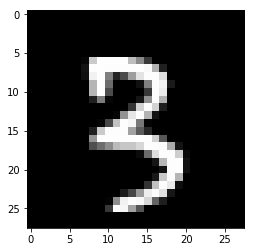

3


In [41]:
rand_num = np.random.randint(len(x_train))

plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
print(y_train[rand_num])

**Our Network accept 1D data. So we flatten our 2D image.**

In [43]:
temp = len(x_train[0])*len(x_train[0][0])
x_train = np.reshape(x_train,(len(x_train), temp))
x_test = np.reshape(x_test,(len(x_test), temp))

**Normalize data by rescaling them to (0,1)**

In [44]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

**Convert label arrays to 1-hot representation**

In [45]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 2. Define Model
**Add the following layers to the network:**
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition (e.g 10 Neurons) calasses:[0,1,2,3,4,5,6,7,8,9]

In [46]:
model = Sequential()
# Hidden Layer1:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01), input_shape=(temp,)))
# Hidden Layer2:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01)))
# Output Layer1:
model.add(Dense(10, activation='softmax',kernel_initializer = RandomNormal(0,0.01)))

**Determine loss function, optimizer and metrics for the model**

In [47]:
#the optimizer and its learning rate
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**Print the review of the model**

In [48]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## 3. Train And Evaluate Model. 
**Train model on training data**

In [49]:
history = model.fit(x_train, y_train, batch_size=32,epochs=3,verbose=1,validation_data=(x_test, y_test),validation_split=0.2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 45s 743us/step - loss: 2.0358 - acc: 0.3699 - val_loss: 4.2829 - val_acc: 0.7188
Epoch 2/3
60000/60000 [==============================] - 46s 760us/step - loss: 0.6132 - acc: 0.8201 - val_loss: 2.0547 - val_acc: 0.8700
Epoch 3/3
60000/60000 [==============================] - 42s 702us/step - loss: 0.3988 - acc: 0.8860 - val_loss: 1.6768 - val_acc: 0.8939


**Evaluate model on test data**

In [50]:
loss = model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)
print(loss)

10000/10000 [==============================] - 2s 155us/step
[1.6768255846023559, 0.8939]


**Save model**

In Keras, you can save the model to a HDF5 file(.h5) and reload it later simply by model.save(filepath) and keras.models.load_model(filepath), respectively.

The saved model contains:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [51]:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

**Load model and Predict label for a random image in train set. Verify predicted label by ploting the image.**

In [67]:
model = load_model('mlp.h5') 

In [104]:
a = np.random.randint(len(x_test))
print(model.predict(x_test)[a])
print(y_test[a])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Continue training + Callbacks**

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 37s 779us/step - loss: 0.3467 - acc: 0.9016 - val_loss: 0.3031 - val_acc: 0.9148
Epoch 2/100
48000/48000 [==============================] - 35s 732us/step - loss: 0.3115 - acc: 0.9113 - val_loss: 0.2770 - val_acc: 0.9213
Epoch 3/100
48000/48000 [==============================] - 35s 729us/step - loss: 0.2808 - acc: 0.9198 - val_loss: 0.2501 - val_acc: 0.9303
Epoch 4/100
48000/48000 [==============================] - 36s 745us/step - loss: 0.2526 - acc: 0.9278 - val_loss: 0.2325 - val_acc: 0.9357
Epoch 5/100
48000/48000 [==============================] - 36s 742us/step - loss: 0.2280 - acc: 0.9350 - val_loss: 0.2099 - val_acc: 0.9425
Epoch 6/100
48000/48000 [==============================] - 35s 737us/step - loss: 0.2062 - acc: 0.9419 - val_loss: 0.1926 - val_acc: 0.9460
Epoch 7/100
48000/48000 [==============================] - 39s 812us/step - loss: 0.1875 - acc: 0.9474 - val_l

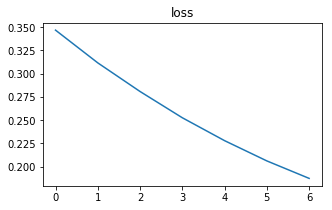

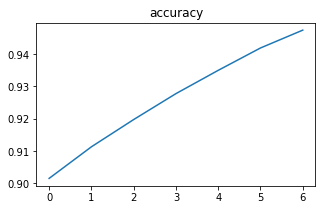

In [105]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_acc', verbose=1, min_delta=0.01, patience = 2, mode = 'max'),
            keras.callbacks.CSVLogger('log.csv'),keras.callbacks.BaseLogger(stateful_metrics=None)]
history = model.fit(x_train, y_train,batch_size = 32,epochs = 100,verbose = 1,validation_split = 0.2,callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [106]:
model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

10000/10000 [==============================] - 2s 163us/step


[0.9298200501026423, 0.9417]